## Analysis of the dataset US census

This is a simplified dataset released by the American Community Survey (part of the US Census) showing detailed estimates of the age and sex breakdown of the population by ZCTA (ZIP code tabulation area), a rough equivalent of zip code.

Unless the column is titled "Total," the population estimates are percentages.

In [306]:
import pandas as pd

# loading dataset from file into dataframe
census_data = pd.read_csv("acs_population_demographics.csv")
print(census_data.head())
print(census_data.shape)

   ZIP  Total; Estimate; Total population  Male; Estimate; Total population  \
0  601                              18088                              8824   
1  602                              40859                             20079   
2  603                              53162                             25971   
3  606                               6415                              3188   
4  610                              28805                             13958   

   Female; Estimate; Total population  Total; Estimate; AGE - Under 5 years  \
0                                9264                                   5.8   
1                               20780                                   5.2   
2                               27191                                   5.3   
3                                3227                                   5.7   
4                               14847                                   5.2   

   Male; Estimate; AGE - Under 5 years  Female; Es

There are 65 columns in this data and 33120 rows. 

In [308]:
# let's get some statistics for each column
census_data.describe(include='all')

,ZIP,Total; Estimate; Total population,Male; Estimate; Total population,Female; Estimate; Total population,Total; Estimate; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,...,Total; Estimate; AGE - 85 years and over,Male; Estimate; AGE - 85 years and over,Female; Estimate; AGE - 85 years and over,Total; Estimate; SUMMARY INDICATORS - Median age (years),Male; Estimate; SUMMARY INDICATORS - Median age (years),Female; Estimate; SUMMARY INDICATORS - Median age (years),Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Child dependency ratio
count,33120.000000,33120.000000,33120.000000,33120.000000,32814.000000,32764.000000,32720.000000,32814.000000,32764.000000,32720.000000,...,32814.000000,32764.000000,32720.000000,32614.000000,32306.000000,32276.000000,32670.000000,32457.000000,32053.000000,31796.000000
mean,49666.334209,9593.274607,4717.528986,4875.745622,5.602965,5.750769,5.457210,5.974322,6.074698,5.859795,...,2.026175,1.449802,2.580562,41.703983,40.683585,42.451701,110.123153,67.838220,31.081484,37.915804
std,27564.925769,14090.093299,6893.986382,7215.787887,3.352056,4.235060,4.060242,3.317577,4.080002,4.136502,...,2.672900,2.702529,3.534591,8.596534,8.936146,8.843847,284.703561,56.738616,55.975705,15.970163
min,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.900000,2.900000,1.900000,1.900000,0.000000,0.000000,0.000000
25%,26634.750000,717.000000,363.000000,349.750000,3.800000,3.400000,3.200000,4.300000,3.900000,3.700000,...,0.800000,0.200000,0.800000,36.400000,35.100000,37.200000,91.325000,55.300000,19.000000,30.300000
50%,49739.000000,2805.500000,1405.000000,1386.000000,5.600000,5.600000,5.300000,6.000000,6.100000,5.700000,...,1.600000,1.000000,2.000000,41.400000,40.200000,42.400000,98.300000,63.900000,25.500000,37.100000
75%,72123.500000,13066.000000,6448.000000,6613.000000,7.200000,7.600000,7.100000,7.500000,7.900000,7.600000,...,2.600000,1.800000,3.400000,46.300000,45.600000,47.400000,107.700000,74.200000,34.000000,44.100000
max,99929.000000,115013.000000,59208.000000,59173.000000,50.000000,100.000000,87.100000,68.800000,100.000000,100.000000,...,96.400000,100.000000,100.000000,91.800000,87.100000,94.300000,31725.000000,6600.000000,6600.000000,528.600000


In [309]:
# There are missing values in this dataset, and also we have 0s for some columns which doesn't make sense,
# therefore those are also missing values. 
census_data.isnull().values.any()

True

In [310]:
# this will print the number of missing values in each column, but this doesn't consider 0s. 
census_data.isnull().sum()

ZIP                                                                           0
Total; Estimate; Total population                                             0
Male; Estimate; Total population                                              0
Female; Estimate; Total population                                            0
Total; Estimate; AGE - Under 5 years                                        306
Male; Estimate; AGE - Under 5 years                                         356
Female; Estimate; AGE - Under 5 years                                       400
Total; Estimate; AGE - 5 to 9 years                                         306
Male; Estimate; AGE - 5 to 9 years                                          356
Female; Estimate; AGE - 5 to 9 years                                        400
Total; Estimate; AGE - 10 to 14 years                                       306
Male; Estimate; AGE - 10 to 14 years                                        356
Female; Estimate; AGE - 10 to 14 years  

Since we have missing values in this dataset, we need to clean data first, either by removing and not considering rows with 0s or by filling them with mean for example.

My original idea was to group zipcodes similar to each other, so groups will be 601-999, 1000-1999, 2000-2999, etc. I was assuming that zipcodes in one group will be close to each other on the map, therefore groups will represent different regions on the map. Assumption was such that regions close to each other should have similar values for the population statistics and therefore for missing values I could've considered mean value of the column but only for this region, not entire column, since data for different states varies a lot. I tried implementing this, but realized I was running out of time, so decided to choose a simpler option.

Then I thought that I should just remove rows with 0s at all, but then realized that the number of rows in the dataset dropped to 20344 from 33120 which is too much. Here I am showing how I removed all rows with 0s and got that result.

In [311]:
df = census_data.replace(0, pd.np.nan).dropna(axis=0, how='any') 
df.describe()

,ZIP,Total; Estimate; Total population,Male; Estimate; Total population,Female; Estimate; Total population,Total; Estimate; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,...,Total; Estimate; AGE - 85 years and over,Male; Estimate; AGE - 85 years and over,Female; Estimate; AGE - 85 years and over,Total; Estimate; SUMMARY INDICATORS - Median age (years),Male; Estimate; SUMMARY INDICATORS - Median age (years),Female; Estimate; SUMMARY INDICATORS - Median age (years),Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Child dependency ratio
count,20344.000000,20344.000000,20344.000000,20344.00000,20344.000000,20344.00000,20344.000000,20344.000000,20344.000000,20344.000000,...,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000,20344.000000
mean,48659.329532,14854.215444,7288.589265,7565.62618,5.963749,6.17528,5.762338,6.329060,6.536296,6.132712,...,2.107688,1.489343,2.712820,40.512820,39.394450,41.575305,99.333071,64.760352,26.744745,38.015592
std,27390.509821,15735.721435,7695.089379,8066.58956,1.943438,2.38580,2.240221,1.873459,2.321699,2.211184,...,1.300493,1.125440,1.774523,6.256045,6.458894,6.456108,17.399348,14.375782,12.143282,9.520615
min,601.000000,192.000000,96.000000,94.00000,0.400000,0.10000,0.200000,0.400000,0.100000,0.100000,...,0.100000,0.100000,0.100000,19.400000,16.900000,17.900000,56.700000,4.700000,1.800000,2.100000
25%,27443.750000,2861.500000,1420.750000,1418.00000,4.700000,4.60000,4.300000,5.200000,5.100000,4.700000,...,1.200000,0.700000,1.500000,36.400000,35.100000,37.400000,92.000000,56.900000,19.300000,32.400000
50%,48847.500000,8581.000000,4265.000000,4339.00000,5.800000,6.10000,5.600000,6.300000,6.500000,6.000000,...,1.800000,1.200000,2.400000,40.600000,39.300000,41.700000,97.300000,63.800000,25.000000,37.700000
75%,70754.250000,22749.000000,11131.500000,11621.00000,7.100000,7.60000,7.000000,7.400000,7.900000,7.400000,...,2.700000,1.900000,3.500000,44.300000,43.400000,45.600000,103.500000,71.600000,31.500000,43.200000
max,99929.000000,115013.000000,59208.000000,59173.00000,21.200000,23.10000,25.600000,17.400000,24.000000,19.800000,...,18.800000,18.400000,20.700000,73.600000,72.800000,74.000000,723.100000,339.400000,322.400000,107.900000


In [312]:
df.shape

(20344, 65)

In [313]:
print(df.agg({'Total; Estimate; Total population':'sum'})) # if we ignore all rows with 0s, entire population is 
# 302 million instead of 318 million 

Total; Estimate; Total population    302194159.0
dtype: float64


In [280]:
# Idea that I haven't finished implementing, related to binning zipcodes into groups

# let's create a new column which is the string for the first two numbers in zipcode
# census_data['zipcode_region'] = census_data['ZIP'].astype(str).str.zfill(5).str.slice(0, 2)
# print(census_data['zipcode_region'])
# groupby_region = census_data.groupby('zipcode_region',as_index=False).agg({'':'sum')

# later, I decided to fill in missing values with the mean for entire column 
cols_not_considered = ['ZIP',
                      'Total; Estimate; SUMMARY INDICATORS - Median age (years)',
                      'Male; Estimate; SUMMARY INDICATORS - Median age (years)','Female; Estimate; SUMMARY INDICATORS - Median age (years)',
                      'Total; Estimate; SUMMARY INDICATORS - Age dependency ratio','Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio',
                      'Total; Estimate; SUMMARY INDICATORS - Child dependency ratio']
for col in census_data:
    if col not in cols_not_considered:
        mean_val = census_data[col].mean()
       
        # replace 0s with na
        census_data[col].replace(0, pd.np.nan,inplace=True)

        # fill those with mean val
        census_data[col].fillna(mean_val,inplace=True)
        
census_data.describe()

,ZIP,Total; Estimate; Total population,Male; Estimate; Total population,Female; Estimate; Total population,Total; Estimate; AGE - Under 5 years,Male; Estimate; AGE - Under 5 years,Female; Estimate; AGE - Under 5 years,Total; Estimate; AGE - 5 to 9 years,Male; Estimate; AGE - 5 to 9 years,Female; Estimate; AGE - 5 to 9 years,...,Total; Estimate; AGE - 85 years and over,Male; Estimate; AGE - 85 years and over,Female; Estimate; AGE - 85 years and over,Total; Estimate; SUMMARY INDICATORS - Median age (years),Male; Estimate; SUMMARY INDICATORS - Median age (years),Female; Estimate; SUMMARY INDICATORS - Median age (years),Total; Estimate; SUMMARY INDICATORS - Sex ratio (males per 100 females),Total; Estimate; SUMMARY INDICATORS - Age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Old-age dependency ratio,Total; Estimate; SUMMARY INDICATORS - Child dependency ratio
count,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,...,33120.000000,33120.000000,33120.000000,32614.000000,32306.000000,32276.000000,33120.000000,32457.000000,32053.000000,31796.000000
mean,49666.334209,9681.908123,4768.236725,4934.631439,6.063958,6.423776,6.102947,6.417886,6.740677,6.488414,...,2.298289,1.787169,3.024447,41.703983,40.683585,42.451701,110.123153,67.838220,31.081484,37.915804
std,27564.925769,14059.607452,6876.427447,7195.624105,2.887375,3.663272,3.513608,2.838625,3.460954,3.581220,...,2.540270,2.573364,3.316609,8.596534,8.936146,8.843847,282.762760,56.738616,55.975705,15.970163
min,601.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,...,0.100000,0.100000,0.100000,5.900000,2.900000,1.900000,1.900000,0.000000,0.000000,0.000000
25%,26634.750000,757.750000,388.000000,376.000000,4.500000,4.600000,4.400000,5.000000,5.000000,4.800000,...,1.200000,0.900000,1.600000,36.400000,35.100000,37.200000,91.500000,55.300000,19.000000,30.300000
50%,49739.000000,2955.000000,1498.000000,1484.000000,5.602965,5.750769,5.457210,6.000000,6.074698,5.859795,...,2.026175,1.449802,2.580562,41.400000,40.200000,42.400000,98.500000,63.900000,25.500000,37.100000
75%,72123.500000,13066.000000,6448.000000,6613.000000,7.100000,7.500000,7.100000,7.500000,7.900000,7.500000,...,2.600000,1.800000,3.400000,46.300000,45.600000,47.400000,108.300000,74.200000,34.000000,44.100000
max,99929.000000,115013.000000,59208.000000,59173.000000,50.000000,100.000000,87.100000,68.800000,100.000000,100.000000,...,96.400000,100.000000,100.000000,91.800000,87.100000,94.300000,31725.000000,6600.000000,6600.000000,528.600000


Now, after I have filled in 0s with the mean values, I proceed to doing some analysis and finding trends. 

The most important question to ask from this dataset would probably be what is the difference between male and female population for different age groups and in general.

Also, I would like to compare the total population in each age group. I will do this first. 

In [316]:
# Total population is 317,729,255, i.e. around 318 million which makes sense 
print(census_data.agg({'Total; Estimate; Total population':'sum'}))
print(census_data.agg({'Male; Estimate; Total population':'sum'}))
print(census_data.agg({'Female; Estimate; Total population':'sum'}))

# We can see that in general there are slightly more females than males in the entire population of USA. 

Total; Estimate; Total population    317729255
dtype: int64
Male; Estimate; Total population    156244560
dtype: int64
Female; Estimate; Total population    161484695
dtype: int64


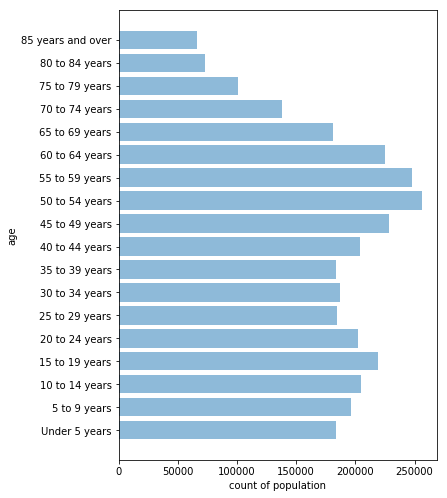

In [317]:
# draw bar chart for total population in each age category 
import numpy as np 
from matplotlib import rcParams

df = census_data
arr = np.zeros((19))
col_names = []
i = 0
for col in df:
    if ('Total' in col) & ('Male' not in col and 'Female' not in col) & ('SUMMARY' not in col):
        arr[i] = (df[col].sum())
        col_names.append(col[23:]) # remove some part of string, leaving only age
        i += 1

# first value is total population, ignore it 
# draw bar chart 
import matplotlib.pyplot as plt
y_pos = np.arange(len(arr[1:]))
rcParams['figure.figsize'] = 5.7,8.27
plt.barh(col_names[1:], arr[1:], align='center', alpha=0.5)
plt.xlabel('count of population')
plt.ylabel('age')
plt.show()

The graph above is showing total population in each age category in USA. It is very interesting to see that the largest age group in US is from the group of 50 to 59 years old, and obviously the smallest group is 85 years and older. There is also a peak in the number of people who are at the age of 15-19 years. Basically after that age group we see a drop in the number of people till the group of age 25-29 years old. 

Now I would like to create the same bar graph for these age groups but now separately for males and females to compare the population in each age category based on gender. 

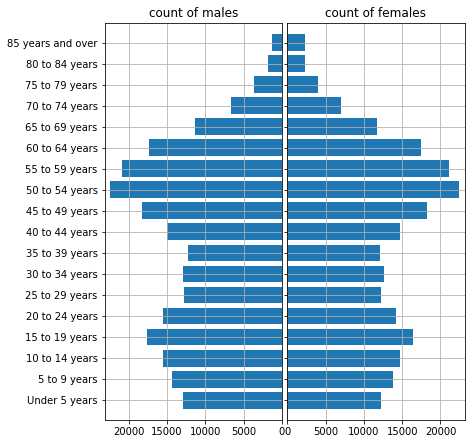

In [303]:
arr_male = np.zeros((18))
arr_female = np.zeros((18))
total_popul = arr[1:] # from previous experiment

i = 0
j = 0
df = census_data
for col in df:
    if ('Male' in col) & ('Total' not in col) & ('SUMMARY' not in col):
        l1 = df[col] * 0.01 
        val = l1.mean()
        arr_male[i] = (val * total_popul[i])
        i += 1
    if ('Female' in col) & ('Total' not in col) & ('SUMMARY' not in col):
        l2 = df[col] * 0.01 
        val = l2.mean()
        arr_female[j] = (val * total_popul[j])
        j += 1

# Now, let's draw our chart
y = range(len(arr_male))

rcParams['figure.figsize'] = 6.7,6.27
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].set(title='count of males')
axes[1].set(title='count of females')
axes[0].set(yticks=y, yticklabels=col_names[1:])
for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

axes[0].barh(y, arr_male, align='center')
axes[1].barh(y, arr_female, align='center')
axes[0].invert_xaxis()

fig.tight_layout()
fig.subplots_adjust(wspace=0.03)
plt.show()

The graph above shows count of males and females in each age category. Looking at this graph we can see in which age categories there are more males or more females. 

For example, from this graph we can say that at the age 5-24 there are more males. But then I came up with better idea for this visualization, and decided to visualize the difference between male population and female population for each age group. 

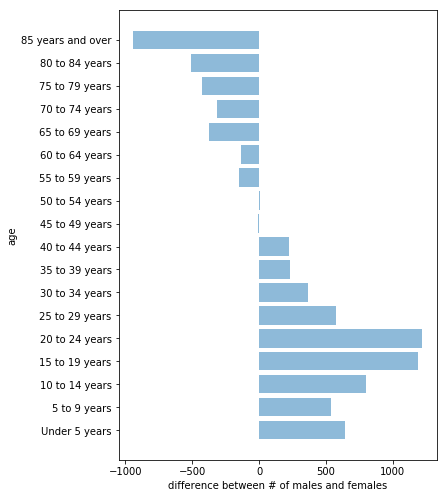

In [318]:
difference = arr_male-arr_female

y_pos = np.arange(len(difference))
rcParams['figure.figsize'] = 5.7,8.27
plt.barh(col_names[1:], difference, align='center', alpha=0.5)
plt.xlabel('difference between # of males and females')
plt.ylabel('age')
plt.show()

Now, this bar chart shows the difference between male and female population in each age group. The trend is very clear, that there are more males in the age groups starting from 0 years old and till 44 years old. Then later, the trend flips and in the rest of the groups there are more females. 